In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
original_data = pd.read_csv('/Users/jonas_gratt/Documents/Databaser/dataset_31_credit-g.csv')

In [3]:
original_data.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [4]:
original_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [5]:
pd.isnull(original_data).sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [6]:
data_numeric = pd.get_dummies(original_data[['class', 'employment', 'personal_status', 'purpose', 'savings_status' , 'housing', 'job' , 'own_telephone' , 'foreign_worker' , 'personal_status' , 'credit_history' ]])

In [7]:
original_data.savings_status.unique()

array(["'no known savings'", "'<100'", "'500<=X<1000'", "'>=1000'",
       "'100<=X<500'"], dtype=object)

In [8]:
o = original_data.select_dtypes(include="int64")
for x in o:
    data_numeric[x] = original_data[x] 

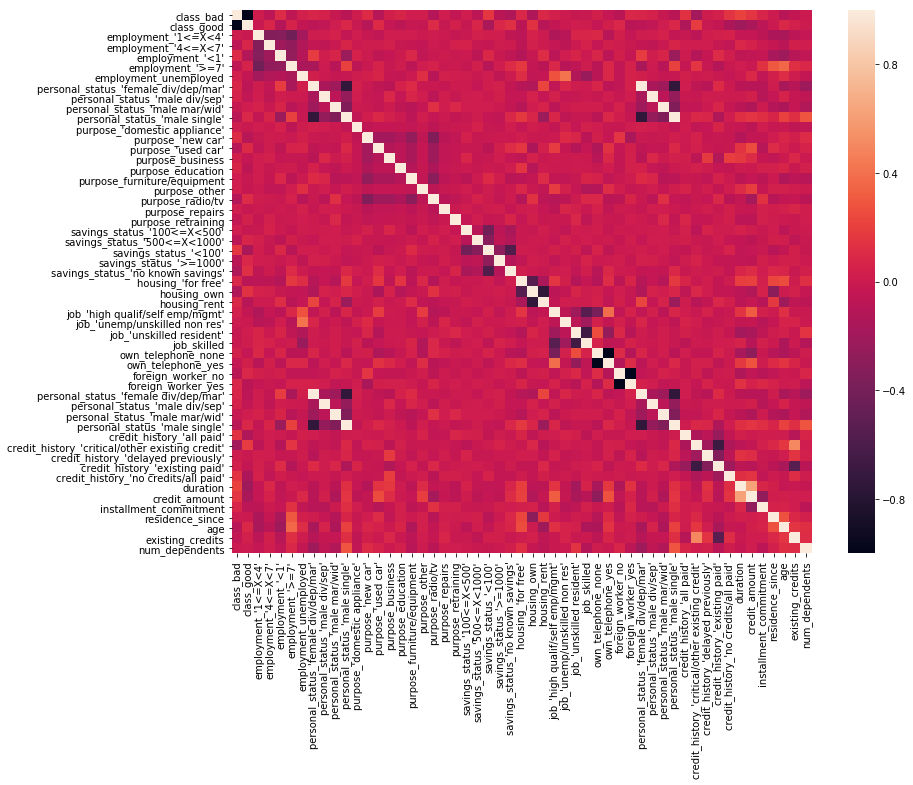

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,10))

sns.heatmap(data_numeric.corr());

In [10]:
data_numeric.head()

,class_bad,class_good,employment_'1<=X<4',employment_'4<=X<7',employment_'<1',employment_'>=7',employment_unemployed,personal_status_'female div/dep/mar',personal_status_'male div/sep',personal_status_'male mar/wid',...,credit_history_'delayed previously',credit_history_'existing paid',credit_history_'no credits/all paid',duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,6,1169,4,4,67,2,1
1,1,0,1,0,0,0,0,1,0,0,...,0,1,0,48,5951,2,2,22,1,1
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,12,2096,2,3,49,1,2
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,42,7882,2,4,45,1,2
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,24,4870,3,4,53,2,2


In [11]:
columns_to_drop = ['class_bad' , "housing_'for free'" , 'housing_rent' , 'own_telephone_none' , 'foreign_worker_no', "job_'unskilled resident'", "credit_history_'existing paid'"]

In [12]:
data_numeric = data_numeric.drop(columns = columns_to_drop)

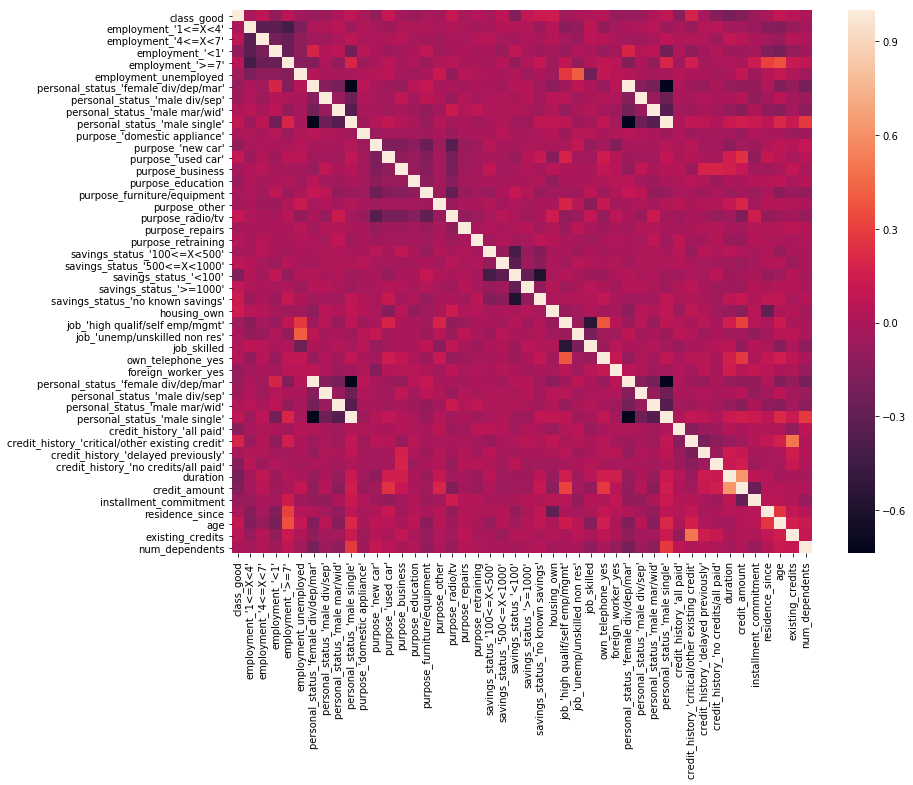

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,10))

sns.heatmap(data_numeric.corr());

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [56]:
columns_to_train = [x for x in data_numeric.columns if x != 'class_good']
data_numeric_X = data_numeric[columns_to_train]
data_numeric_y = data_numeric['class_good']

X_train, X_test, y_train, y_test = train_test_split(data_numeric_X, data_numeric_y, test_size=0.2)

In [ ]:
model_svm = svm.SVC(kernel="poly" , gamma='auto').fit(X_train, y_train)
pred_test_svm = model_svm.predict(X_test)
print(confusion_matrix(y_test, pred_test_svm))
accuracy_score(y_test, pred_test_svm)

In [63]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
pred_test_rf = model_rf.predict(X_test)
print (confusion_matrix(y_test, pred_test_rf))
accuracy_score(y_test, pred_test_rf)

[[ 16  50]
 [  5 129]]


0.725

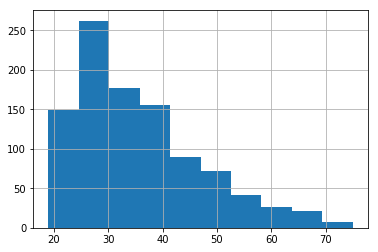

In [29]:
data_numeric.age.hist();

In [19]:
data_numeric.head()

,class_good,employment_'1<=X<4',employment_'4<=X<7',employment_'<1',employment_'>=7',employment_unemployed,personal_status_'female div/dep/mar',personal_status_'male div/sep',personal_status_'male mar/wid',personal_status_'male single',...,credit_history_'critical/other existing credit',credit_history_'delayed previously',credit_history_'no credits/all paid',duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,1,0,0,0,1,0,0,0,0,1,...,1,0,0,6,1169,4,4,67,2,1
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,48,5951,2,2,22,1,1
2,1,0,1,0,0,0,0,0,0,1,...,1,0,0,12,2096,2,3,49,1,2
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,42,7882,2,4,45,1,2
4,0,1,0,0,0,0,0,0,0,1,...,0,1,0,24,4870,3,4,53,2,2


In [20]:
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
scaled_columns = pd.DataFrame(scaler.fit_transform(data_numeric[['duration', 'credit_amount' , 'installment_commitment', 'residence_since', 'age']]), columns = ['duration', 'credit_amount' , 'installment_commitment', 'residence_since', 'age'])

scaled_columns.head()
scaled_columns.shape

/Users/jonas_gratt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(1000, 5)

In [24]:
data_numeric_normalized = data_numeric.drop(columns = ['duration', 'credit_amount' , 'installment_commitment', 'residence_since', 'age'])
data_numeric_normalized = pd.merge(data_numeric_normalized, scaled_columns, how = 'outer' , on = data_numeric_normalized.index)

In [26]:
columns_to_train_norm = [x for x in data_numeric_normalized.columns if x != 'class_good']
data_numeric_X = data_numeric_normalized[columns_to_train_norm]
data_numeric_y = data_numeric['class_good']

X_train, X_test, y_train, y_test = train_test_split(data_numeric_X, data_numeric_y, test_size=0.2)

In [27]:
model_rf_scaled = RandomForestClassifier().fit(X_train, y_train)
pred_test_rf_scaled = model_rf_scaled.predict(X_test)
print (confusion_matrix(y_test, pred_test_rf_scaled))
accuracy_score(y_test, pred_test_rf_scaled)

[[ 28  33]
 [ 22 117]]


/Users/jonas_gratt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.725

In [28]:
model_svm_scaled = svm.SVC(kernel="linear", C=0.025).fit(X_train, y_train)
pred_test_svm_scaled = model_svm_scaled.predict(X_test)
print(confusion_matrix(y_test, pred_test_svm_scaled))
accuracy_score(y_test, pred_test_svm_scaled)

[[  0  61]
 [  0 139]]


0.695

In [34]:
model_GNB_scaled = GaussianNB().fit(X_train, y_train)
pred_test_GNB_scaled = model_GNB_scaled.predict(X_test)
print(confusion_matrix(y_test, pred_test_GNB_scaled))
accuracy_score(y_test, pred_test_GNB_scaled)

[[ 25  36]
 [ 30 109]]


0.67

In [37]:
model_LOG_scaled = LogisticRegression().fit(X_train, y_train)
pred_test_LOG_scaled = model_LOG_scaled.predict(X_test)
print(confusion_matrix(y_test, pred_test_LOG_scaled))
accuracy_score(y_test, pred_test_LOG_scaled)

[[ 18  43]
 [ 10 129]]


/Users/jonas_gratt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.735

In [54]:
model_KN_scaled = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)
pred_test_KN_scaled = model_KN_scaled.predict(X_test)
print(confusion_matrix(y_test, pred_test_KN_scaled))
accuracy_score(y_test, pred_test_KN_scaled)

[[  8  53]
 [ 13 126]]


0.67

In [55]:
model_LOG_scaled = LogisticRegression().fit(X_train, y_train)
pred_test_LOG_scaled = model_LOG_scaled.predict(X_train)
print(confusion_matrix(y_train, pred_test_LOG_scaled))
accuracy_score(y_train, pred_test_LOG_scaled)

[[108 131]
 [ 40 521]]


/Users/jonas_gratt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.78625